In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import articles size data
articles_byte_size_file_path = 'data/processed/articles_byte_size.csv'
articles_byte_size_data = pd.read_csv(articles_byte_size_file_path)

Text(0, 0.5, 'Average Wikipedia article byte size')

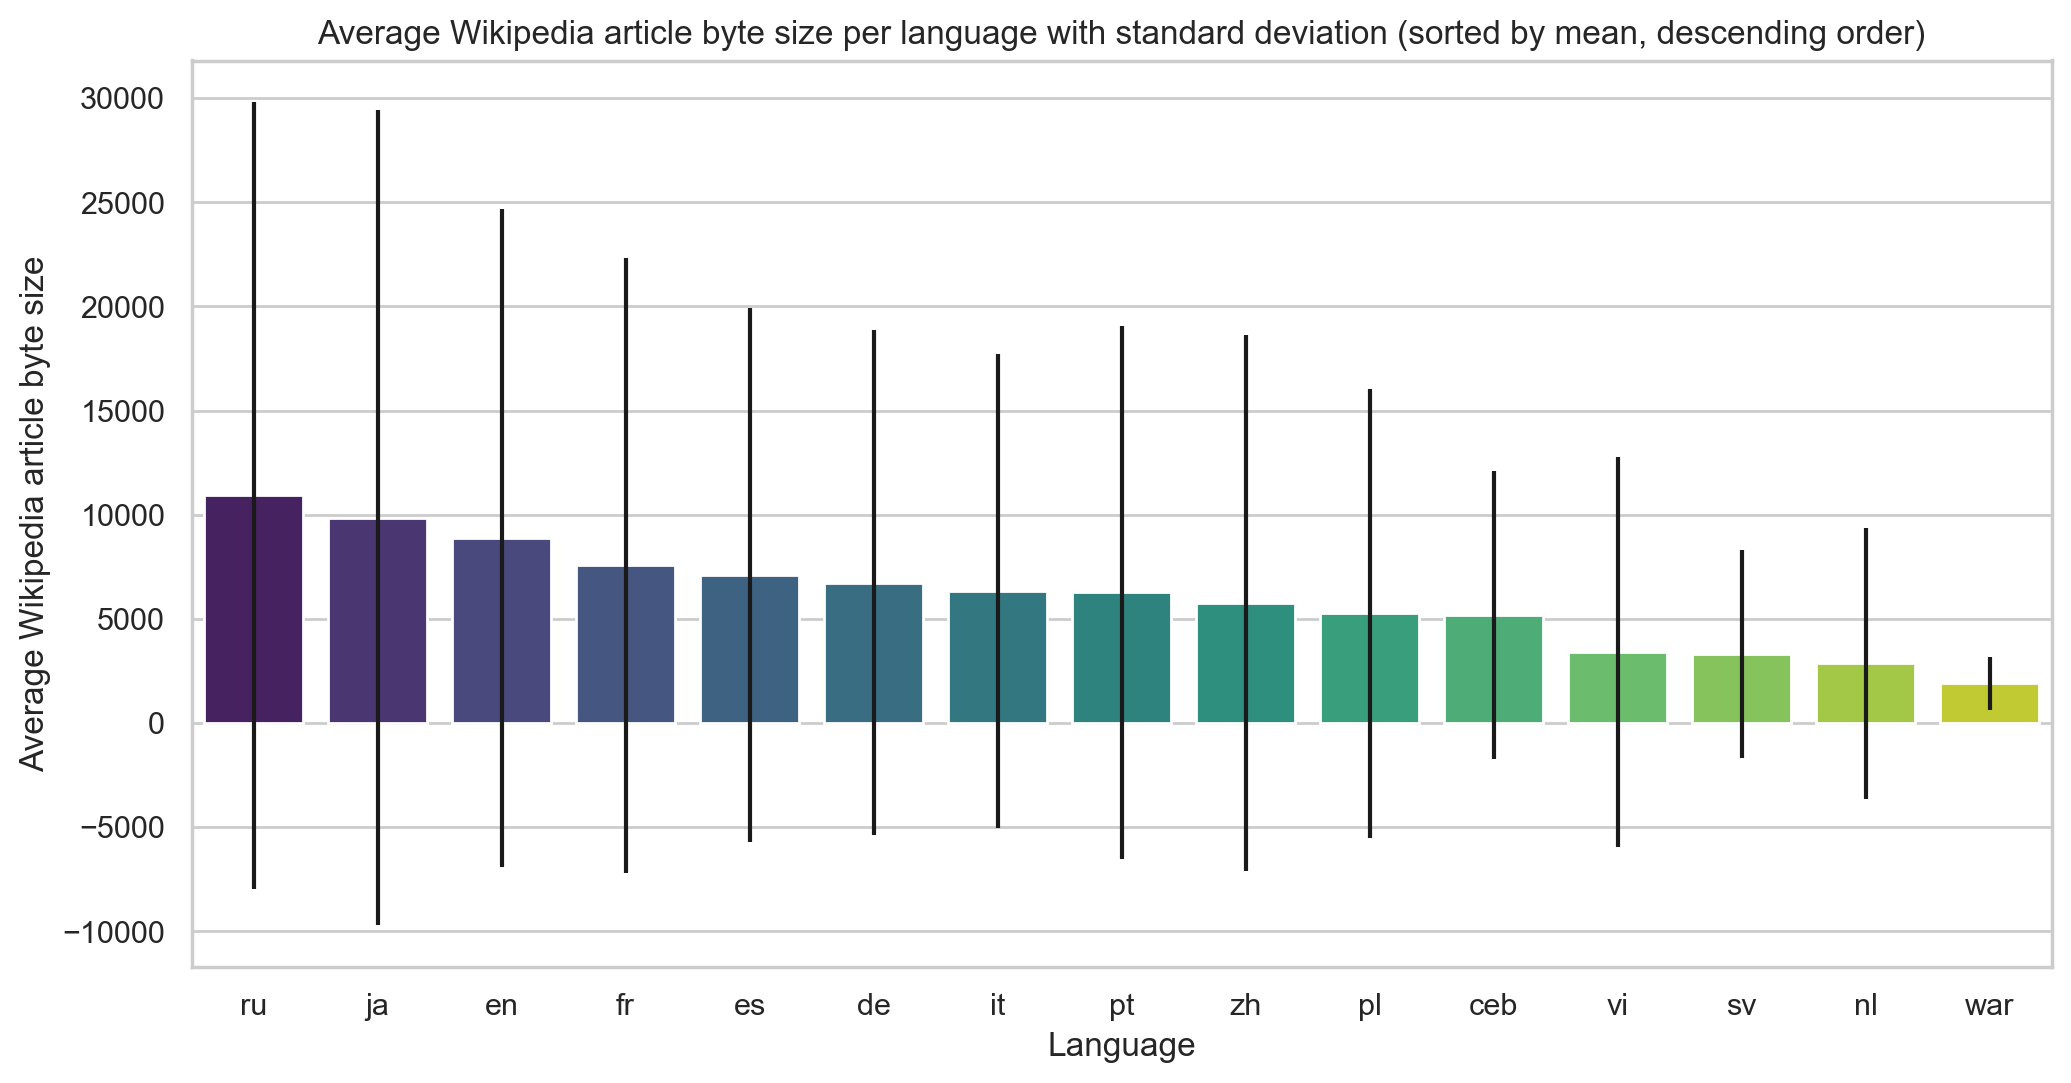

In [3]:
# Display sorted mean articles byte size
articles_byte_size_data_sorted = articles_byte_size_data.sort_values(by='average', ascending=False)

plt.figure(figsize=(12, 6), dpi=200)
sns.set(style="whitegrid")
barplot = sns.barplot(x='language', y='average', data=articles_byte_size_data_sorted, yerr=articles_byte_size_data_sorted['stdev'], palette="viridis")

barplot.set_title('Average Wikipedia article byte size per language with standard deviation (sorted by mean, descending order)')
barplot.set_xlabel('Language')
barplot.set_ylabel('Average Wikipedia article byte size')

In [4]:
# Import articles bytes per char data
articles_bytes_per_char_file_path = 'data/processed/articles_bytes_per_char.csv'
articles_bytes_per_char_data = pd.read_csv(articles_bytes_per_char_file_path)

In [5]:
# Calculate adjusted articles byte size based on bytes per char data
merged_data = pd.merge(articles_byte_size_data, articles_bytes_per_char_data, on='language', suffixes=('_size', '_bytes'))
merged_data['adjusted_average'] = merged_data['average_size'] / merged_data['average_bytes']
merged_data_sorted = merged_data.sort_values(by='adjusted_average', ascending=False)

Text(0, 0.5, 'Adjusted Average Corpus Size')

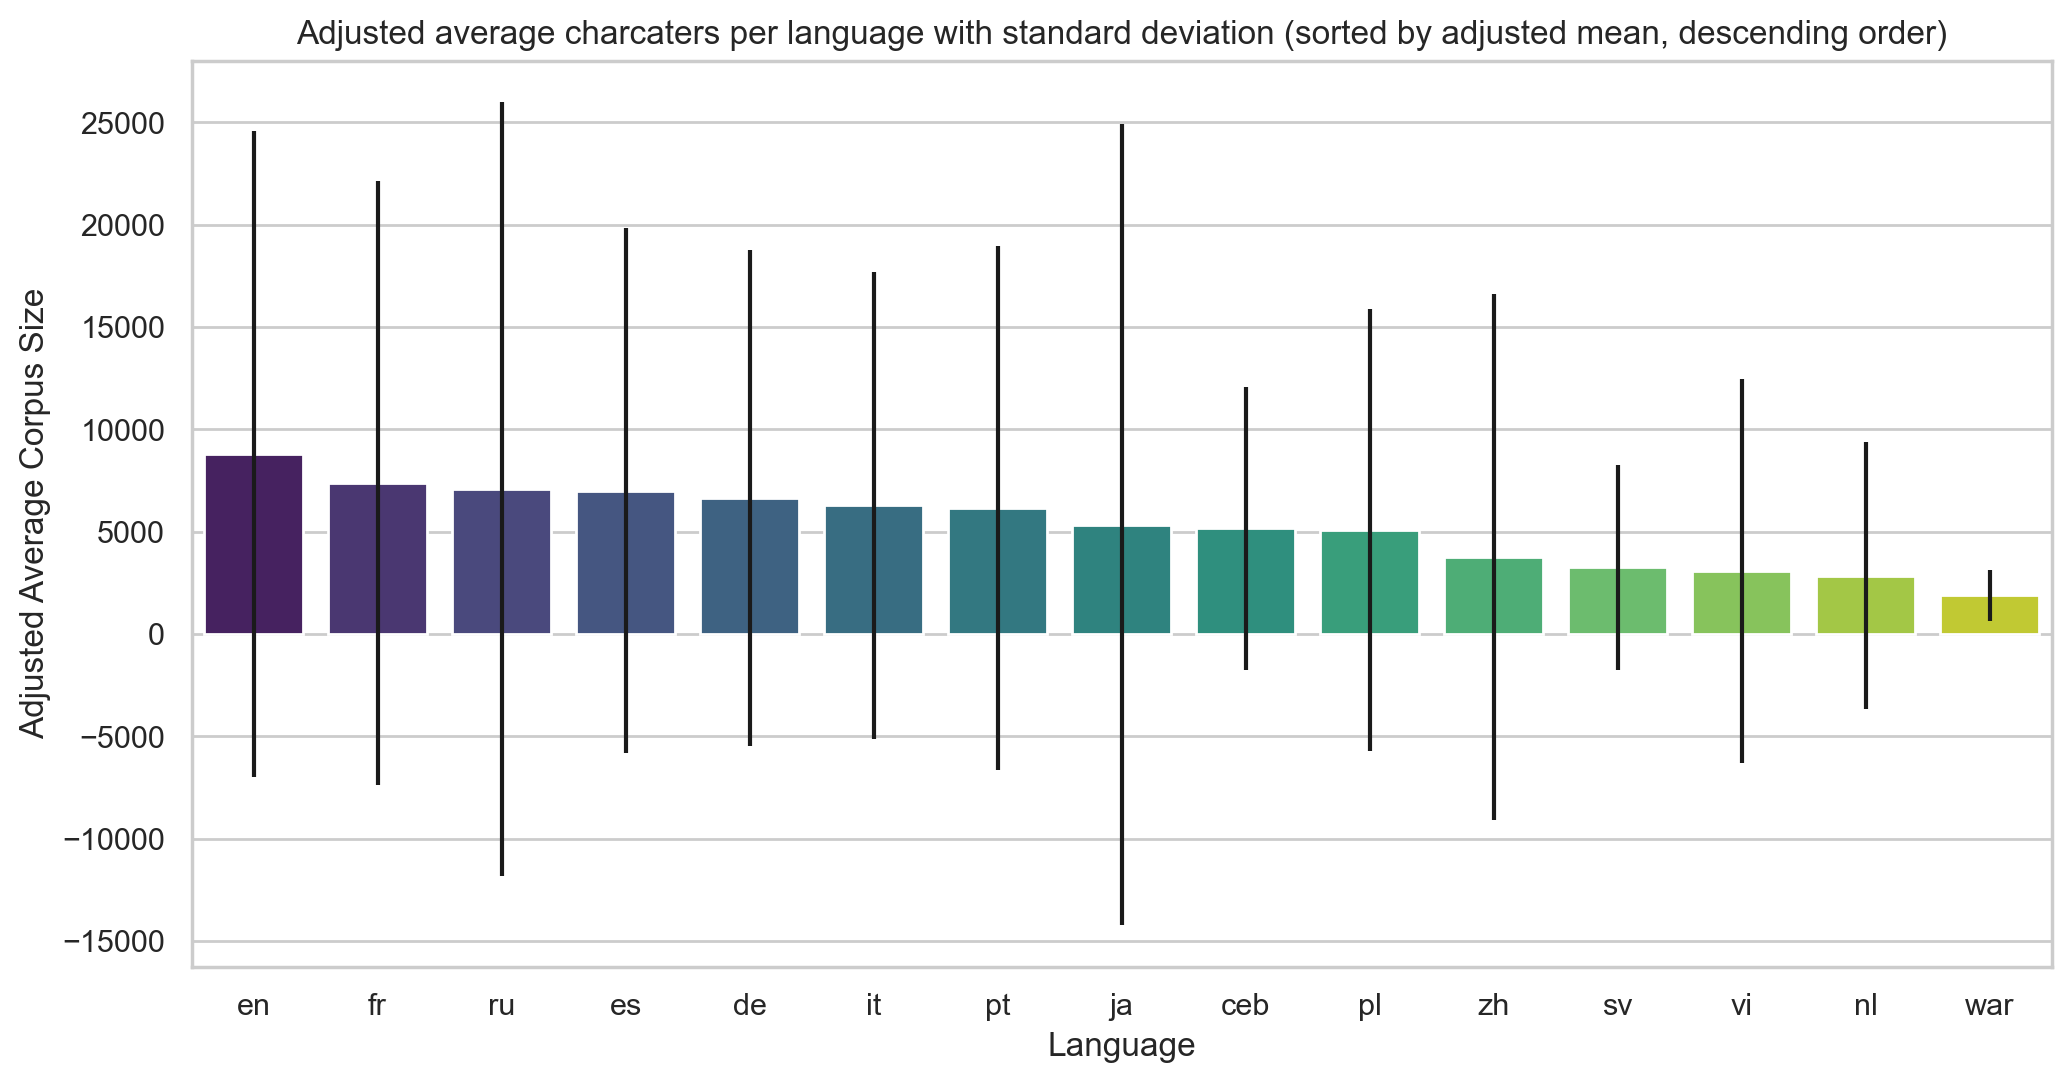

In [6]:
# Display sorted mean articles characters size
plt.figure(figsize=(12, 6), dpi=200)
sns.set(style="whitegrid")

barplot = sns.barplot(x='language', y='adjusted_average', data=merged_data_sorted, yerr=merged_data_sorted['stdev_size'], palette="viridis")

barplot.set_title('Adjusted average charcaters per language with standard deviation (sorted by adjusted mean, descending order)')
barplot.set_xlabel('Language')
barplot.set_ylabel('Adjusted Average Corpus Size')

Text(284.5, 0.5, 'Reference Language')

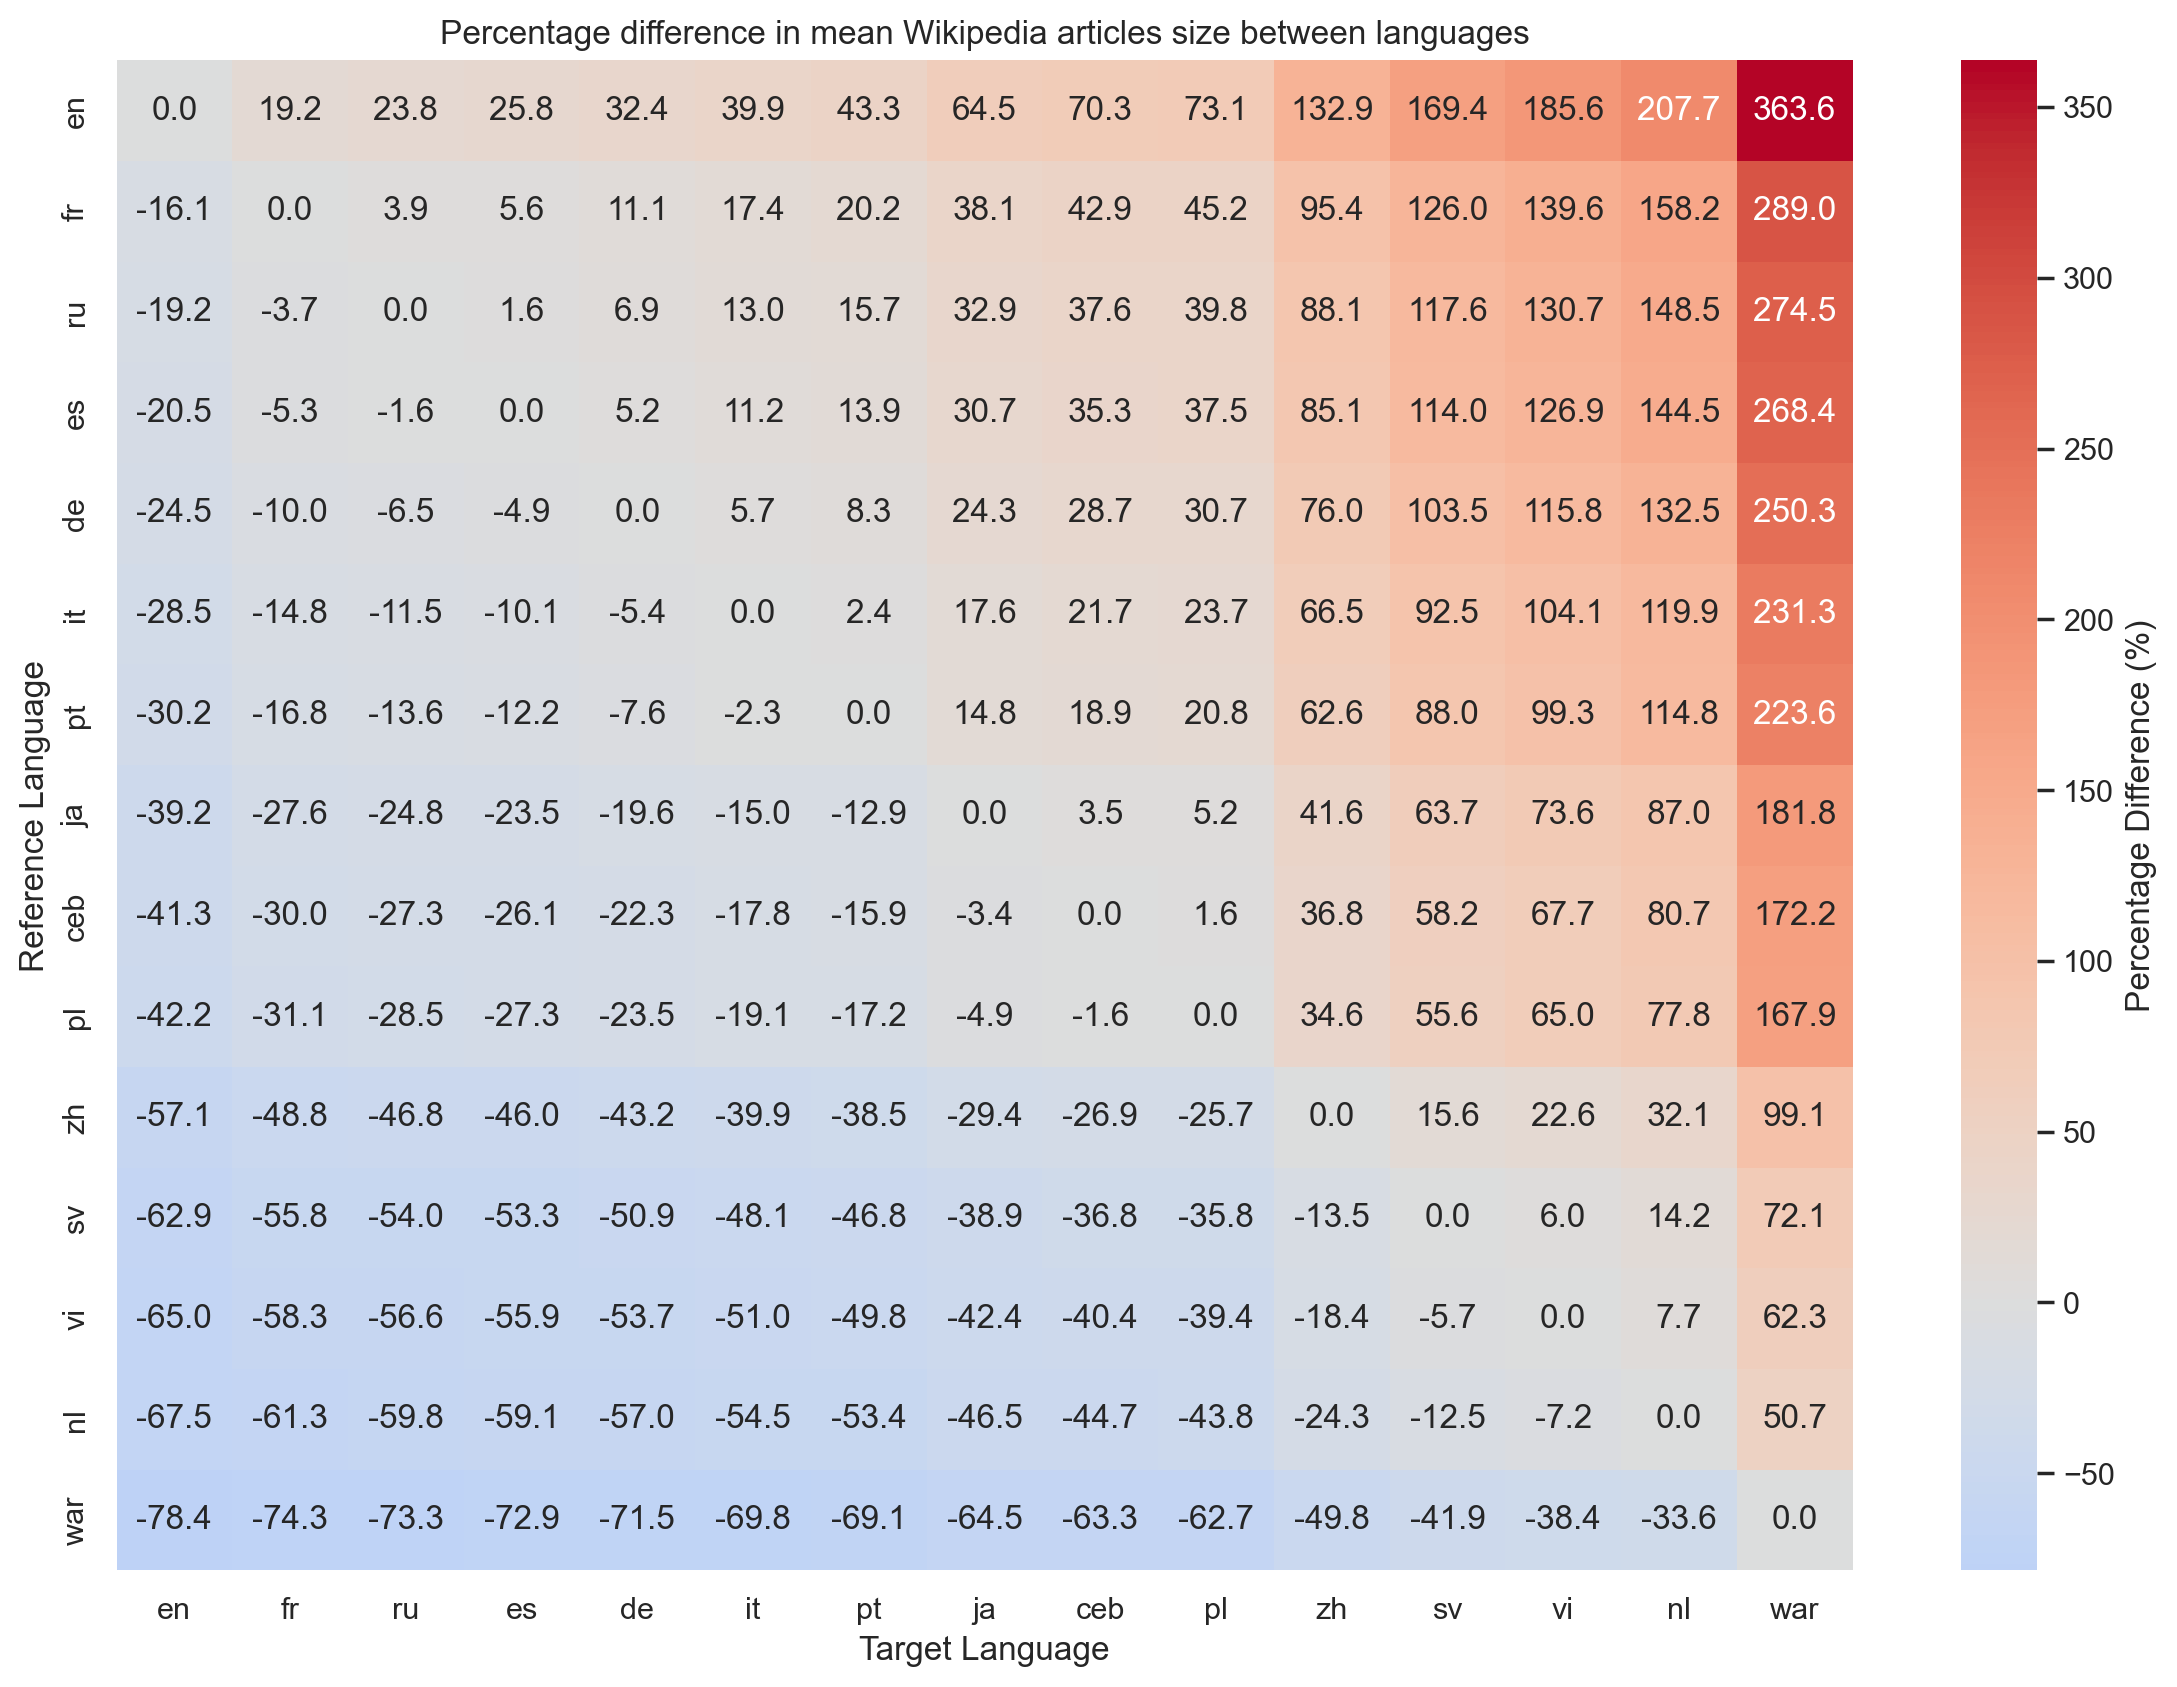

In [7]:
languages = merged_data_sorted['language'].values
percentage_diff_df = pd.DataFrame(index=languages, columns=languages)

# Calculate the percentage difference between each pair of languages
for lang1 in languages:
    for lang2 in languages:
        value1 = merged_data_sorted.loc[merged_data_sorted['language'] == lang1, 'adjusted_average'].values[0]
        value2 = merged_data_sorted.loc[merged_data_sorted['language'] == lang2, 'adjusted_average'].values[0]
        percentage_diff = ((value1 - value2) / value2) * 100
        percentage_diff_df.loc[lang1, lang2] = percentage_diff

plt.figure(figsize=(14, 10), dpi=200)
sns.set(style="whitegrid")

# Create a heatmap of the percentage differences
heatmap = sns.heatmap(percentage_diff_df.astype(float), annot=True, fmt=".1f", cmap='coolwarm', center=0, cbar_kws={'label': 'Percentage Difference (%)'})

heatmap.set_title('Percentage difference in mean Wikipedia articles size between languages')
heatmap.set_xlabel('Target Language')
heatmap.set_ylabel('Reference Language')